In [25]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [26]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [27]:
head(airbnb, n = 6)

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [28]:
newcolnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb)<-newcolnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [61]:
airbnb$MetrosCuadrados <- airbnb['PiesCuadrados']*0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2015 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [62]:
#Cambiando los valores [" ", "-", "28"] como NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='' | airbnb$CodigoPostal=='-' | airbnb$CodigoPostal=='28'] <- NA
#Cambiando lo que no comiencen por 28
airbnb$CodigoPostal[!grepl("^28",airbnb$CodigoPostal)] <- NA

#Cambiando las entradas repetidas
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051'] <- '28051'
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004']<-'28004'

#Cambiando las entradas
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805']<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2005']<-'28015'


#Aplicando una expresión regular para limpiar los datos
airbnb$CodigoPostal <- gsub('[^(28)]\\d{3}', NA, airbnb$CodigoPostal)
airbnb$CodigoPostal<-factor(airbnb$CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [63]:
paste("Tenemos",length(unique(airbnb$CodigoPostal)),"codigos postales")

[1] "Tenemos 62 codigos postales"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [114]:
print("Los 5 códigos postales con más entradas son:")
moreZipcodes <- data.frame(head(sort(table(airbnb$CodigoPostal),decreasing = T),5))
names(moreZipcodes) <- c("Códigos Postales", "Número de entradas")
print(moreZipcodes)
print("Los 5 códigos postales con menos entradas son:")
lessZipcodes <- data.frame(head(sort(table(airbnb$CodigoPostal),decreasing = F),5))
names(lessZipcodes) <- c("Códigos Postales", "Número de entradas")
print(lessZipcodes)

[1] "Los 5 códigos postales con más entradas son:"
  Códigos Postales Número de entradas
1            28012               2060
2            28004               1795
3            28005               1195
4            28013               1019
5            28014                630
[1] "Los 5 códigos postales con menos entradas son:"
  Códigos Postales Número de entradas
1            28048                  1
2            28052                  1
3            28056                  1
4            28058                  1
5            28060                  1


¿Cuales son los barrios que hay en el código postal 28012?

In [115]:
unique(airbnb[which(airbnb$CodigoPostal=='28012'),]$Barrio)

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [117]:
zipCode_28012<-airbnb[which(airbnb$CodigoPostal=='28012'),]
zipCode_28012$Barrio<-factor(zipCode_28012$Barrio)
table(zipCode_28012$Barrio)


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [123]:
paste("Número de barrios: ", length(unique(airbnb$Barrio)))

levels(airbnb$Barrio)

[1] "Número de barrios:  125"

[1] "Abrantes"                       "Acacias"                       
  [3] "Adelfas"                        "Aeropuerto"                    
  [5] "Aguilas"                        "Alameda de Osuna"              
  [7] "Almagro"                        "Almenara"                      
  [9] "Almendrales"                    "Aluche"                        
 [11] "Ambroz"                         "Amposta"                       
 [13] "Apostol Santiago"               "Arapiles"                      
 [15] "Aravaca"                        "Arcos"                         
 [17] "ArgÃ¼elles"                     "Atocha"                        
 [19] "Bellas Vistas"                  "Berruguete"                    
 [21] "Buenavista"                     "Butarque"                      
 [23] "CÃ¡rmenes"                      "Campamento"                    
 [25] "Canillas"                       "Canillejas"                    
 [27] "Casa de Campo"                  "Casco HistÃ³rico de Barajas"   
 [29] "Casco HistÃ³rico de Vallecas"   "Casco HistÃ³rico de VicÃ¡lvaro"
 [31] "Castellana"                     "Castilla"                      
 [33] "Castillejos"                    "Chopera"                       
 [35] "Ciudad JardÃ­n"                 "Ciudad Universitaria"          
 [37] "Colina"                         "Comillas"                      
 [39] "ConcepciÃ³n"                    "Corralejos"                    
 [41] "Cortes"                         "Costillares"                   
 [43] "Cuatro Caminos"                 "Cuatro Vientos"                
 [45] "Delicias"                       "El Goloso"                     
 [47] "El PlantÃ­o"                    "El Viso"                       
 [49] "Embajadores"                    "EntrevÃ­as"                    
 [51] "Estrella"                       "FontarrÃ³n"                    
 [53] "Fuente del Berro"               "Fuentelareina"                 
 [55] "Gaztambide"                     "Goya"                          
 [57] "Guindalera"                     "HellÃ­n"                       
 [59] "HispanoamÃ©rica"                "Ibiza"                         
 [61] "Imperial"                       "JerÃ³nimos"                    
 [63] "Justicia"                       "La Paz"                        
 [65] "Legazpi"                        "Lista"                         
 [67] "Los Angeles"                    "Los Rosales"                   
 [69] "Lucero"                         "Marroquina"                    
 [71] "Media Legua"                    "Mirasierra"                    
 [73] "MoscardÃ³"                      "NiÃ±o JesÃºs"                  
 [75] "Nueva EspaÃ±a"                  "Numancia"                      
 [77] "OpaÃ±el"                        "Orcasitas"                     
 [79] "Orcasur"                        "PacÃ­fico"                     
 [81] "Palacio"                        "Palomas"                       
 [83] "Palomeras Bajas"                "Palomeras Sureste"             
 [85] "Palos de Moguer"                "Pavones"                       
 [87] "PeÃ±agrande"                    "Pilar"                         
 [89] "Pinar del Rey"                  "Piovera"                       
 [91] "Portazgo"                       "Pradolongo"                    
 [93] "Prosperidad"                    "Pueblo Nuevo"                  
 [95] "Puerta Bonita"                  "Puerta del Angel"              
 [97] "Quintana"                       "Recoletos"                     
 [99] "Rejas"                          "Rios Rosas"                    
[101] "Rosas"                          "Salvador"                      
[103] "San AndrÃ©s"                    "San Cristobal"                 
[105] "San Diego"                      "San FermÃ­n"                   
[107] "San Isidro"                     "San Juan Bautista"             
[109] "San Pascual"                    "Santa Eugenia"                 
[111] "Simancas"                       "So

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [125]:
print("Los 5 barrios con más entradas son:")
moreNeighborhoods <- data.frame(head(sort(table(airbnb$Barrio),decreasing = T),5))
names(moreNeighborhoods) <- c("Barrios", "Número de entradas")
print(moreNeighborhoods)

[1] "Los 5 barrios con más entradas son:"
      Barrios Número de entradas
1 Embajadores               1844
2 Universidad               1358
3     Palacio               1083
4         Sol                940
5    Justicia                785


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [69]:
length(unique(airbnb$TipoAlquiler))
table(airbnb$TipoAlquiler)

[1] 3


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."

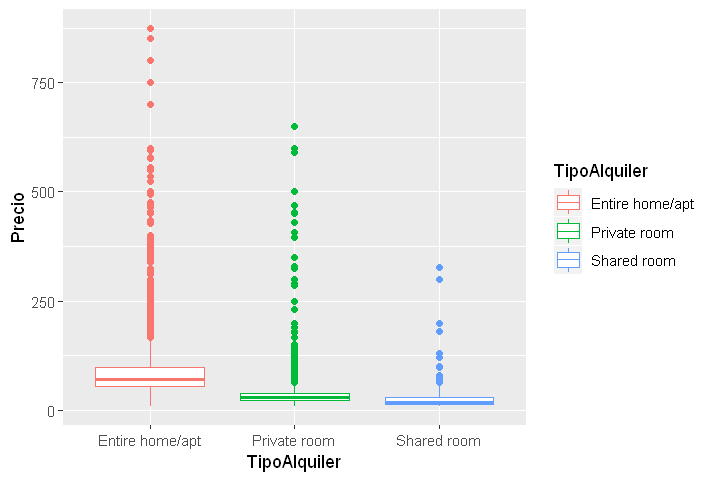

In [126]:
library(ggplot2)
ggplot(airbnb,aes(y=Precio,x=TipoAlquiler,color=TipoAlquiler))+geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [71]:
for (tipo in levels(airbnb$TipoAlquiler)){
    df<-subset(airbnb,TipoAlquiler==tipo)
    print(paste("Precio medio tipo",tipo," = ",mean(df$Precio,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$Precio)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

kt<-kruskal.test(Precio~TipoAlquiler,airbnb)

paste("Los precios medios del aqluiler son diferentes porque  el pvalor es muy bajo. pvalor=",kt$p.value)

[1] "Precio medio tipo Entire home/apt  =  87.2966058763931"
[1] " - Test shapiro pvalor =  1.24077898621874e-72"
[1] "Precio medio tipo Private room  =  34.255135981217"
[1] " - Test shapiro pvalor =  9.18974842339072e-85"
[1] "Precio medio tipo Shared room  =  29.8534031413613"
[1] " - Test shapiro pvalor =  4.51672121600842e-24"


[1] "Las medias son estadísticamente diferentes ya que el pvalor es muy bajo. pvalor= 0"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [72]:
airbnb_entire<-subset(airbnb,TipoAlquiler=='Entire home/apt')

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [73]:
head(sort(table(airbnb_entire$Barrio),decreasing = T),5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [74]:
mean_price<-aggregate(. ~ Barrio, airbnb_entire[,c("Precio","Barrio")], mean,na.rm=FALSE)
mean_price<-aggregate(Precio ~ Barrio, airbnb_entire, mean,na.rm=TRUE)
mean_price

Barrio,Precio
Abrantes,46.00000
Acacias,68.16393
Adelfas,68.72727
Aeropuerto,38.00000
Aguilas,54.50000
Alameda de Osuna,138.75000
Almagro,109.18557
Almenara,65.68000
Almendrales,77.50000
Aluche,55.88889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [130]:
count_value<-data.frame(table(airbnb_entire$Barrio))
colnames(count_value)<-c("Barrio","Freq")
mean_price<-merge(count_value,mean_price,by="Barrio")

mean_price<-mean_price[order(mean_price$Precio,decreasing = T),]
head(mean_price,5)

,Barrio,Freq,Freq.x,Freq.y,Precio
77,Palomas,4,4,4,309.7500
50,Fuentelareina,2,2,2,180.0000
93,Recoletos,135,135,135,161.9254
43,El PlantÃ­o,1,1,1,150.0000
30,Castellana,73,73,73,141.3889


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [131]:
mean_price_100<-subset(mean_price,mean_price$Freq>100)

head(mean_price_100,5)
barrios<-head(mean_price_100,5)$Barrio

,Barrio,Freq,Freq.x,Freq.y,Precio
93,Recoletos,135,135,135,161.92537
52,Goya,142,142,142,111.33803
106,Sol,701,701,701,100.75036
108,Trafalgar,223,223,223,98.57848
59,Justicia,534,534,534,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

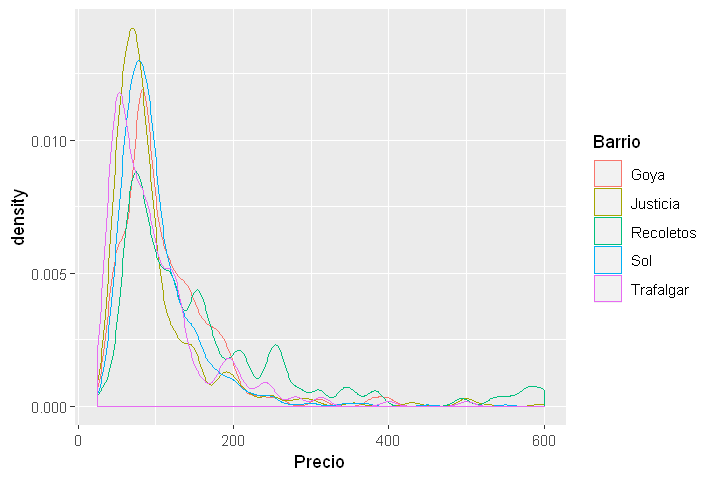

In [132]:
top_barrios<-subset(airbnb_entire,Barrio %in% barrios)
ggplot(top_barrios,aes(x=Precio,color=Barrio))+geom_density(bw=10)

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [133]:
airbnb_entire$MetrosCuadrados <- unlist(airbnb_entire$MetrosCuadrados)
mean_size<-aggregate(. ~ Barrio, airbnb_entire[c("Barrio","MetrosCuadrados")], mean, na.rm=TRUE)
mean_price_size_100<-merge(mean_price_100,mean_size,by="Barrio")

mean_price_size_100<-mean_price_size_100[order(mean_price_size_100$Precio,decreasing = T),]
head(mean_price_size_100,5)

,Barrio,Freq,Freq.x,Freq.y,Precio,MetrosCuadrados
8,Recoletos,135,135,135,161.92537,26.66316
4,Goya,142,142,142,111.33803,51.68504
9,Sol,701,701,701,100.75036,45.61692
10,Trafalgar,223,223,223,98.57848,29.30426
5,Justicia,534,534,534,98.25468,28.52669


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 1645 rows containing non-finite values (stat_density)."

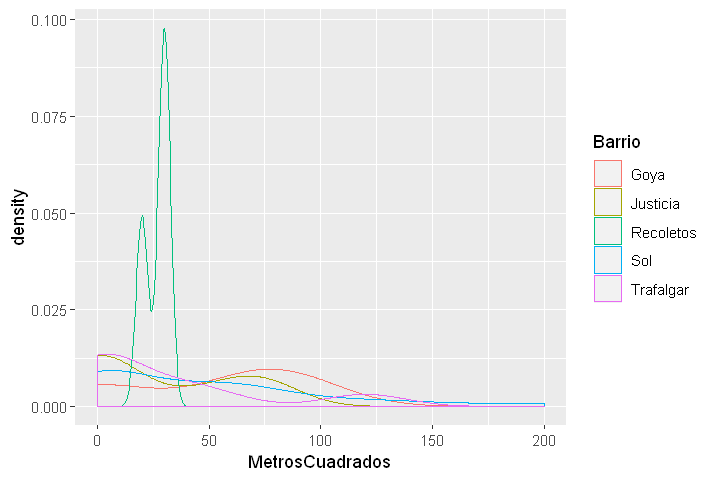

In [134]:
top_barrios<-subset(airbnb_entire,Barrio %in% barrios)
ggplot(top_barrios,aes(x=MetrosCuadrados,color=Barrio))+geom_density()

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [135]:
for (barrio in unique(top_barrios$Barrio)){
    df<-top_barrios[which(top_barrios$Barrio==as.character(barrio)),]
    print(paste("Precio medio tipo",barrio," = ",mean(df$MetrosCuadrados,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$MetrosCuadrados)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

kt<-kruskal.test(MetrosCuadrados~Barrio,top_barrios)
kt
paste("No hay evidencias suficientes que determinen que en cada uno de esos barrios el tamaño de los apartamentos es diferente",
     "El pvalor del test es muy alto. pvalor=",kt$p.value)

[1] "Precio medio tipo Sol  =  45.6169213833333"
[1] " - Test shapiro pvalor =  8.6913775134728e-07"
[1] "Precio medio tipo Justicia  =  28.5266858823529"
[1] " - Test shapiro pvalor =  0.00064192630271212"
[1] "Precio medio tipo Recoletos  =  26.663161"
[1] " - Test shapiro pvalor =  0"
[1] "Precio medio tipo Goya  =  51.6850356666667"
[1] " - Test shapiro pvalor =  0.519924091564745"
[1] "Precio medio tipo Trafalgar  =  29.3042605714286"
[1] " - Test shapiro pvalor =  0.0127581397426826"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "No hay evidencias suficientes que determinen que en cada uno de esos barrios el tamaño de los apartamentos es diferente El pvalor del test es muy alto. pvalor= 0.757443581555649"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [136]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
nrow(barrio_sol)

[1] 701

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [137]:
cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
"Removed 641 rows containing non-finite values (stat_density)."

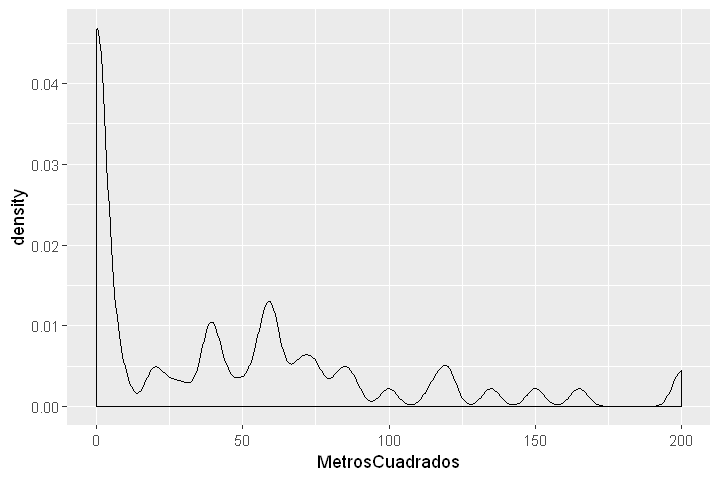

In [138]:
ggplot(barrio_sol,aes(x=MetrosCuadrados))+geom_density(bw=3)

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [139]:
model<-lm(barrio_sol,formula=Precio~NumBanyos+NumDormitorios+MetrosCuadrados+MaxOcupantes)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.852 -15.599  -4.021  10.042 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.28673   10.25650   4.123 0.000127 ***
NumBanyos       15.70888   10.15721   1.547 0.127701    
NumDormitorios  22.75344    6.55828   3.469 0.001022 ** 
MetrosCuadrados  0.29900    0.09997   2.991 0.004155 ** 
MaxOcupantes    -2.85045    2.60279  -1.095 0.278223    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.534e-11


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [140]:
# El número de habitaciones

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [141]:
model<-lm(barrio_sol,formula=Precio~MetrosCuadrados)
confint(model)["MetrosCuadrados",]

2.5 %    97.5 % 
0.4190858 0.8082612

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [142]:
model<-lm(barrio_sol,formula=Precio~NumDormitorios)
confint(model)["NumDormitorios",]

2.5 %   97.5 % 
30.50004 36.22803

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [143]:
# Cuantos anuncios con 3 dormitorios en el barrio de Sol:
numApartamentos <-sum(barrio_sol$NumDormitorios==3)
# Total de anuncios en Sol:
total<-nrow(barrio_sol)
print(paste("La probabilidad es:",numApartamentos/total))
print("El intervalo de confianza es:")
binom.test(num3dormitorios,numTotal)$conf

[1] "La probabilidad es: 0.0784593437945792"
[1] "El intervalo de confianza es:"


[1] 0.0596506 0.1009033
attr(,"conf.level")
[1] 0.95